In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [3]:
# Read the data
seasons = list(range(2011, 2020))
season_val_dict = {season:pd.read_csv(f'season_val/{season}.csv') 
                   for season in seasons}
season_scraped_dict = {season:pd.read_csv(f'season_scraped/{season}.csv') 
                       for season in seasons}

In [4]:
# Prepare Data
def prepare_data(dict_, team_col):
    for season in dict_.keys():
        temp = dict_[season]
        temp['Season'] = season
        temp['Season_Tm'] = temp['Season'].apply(str)\
                                          .str.cat(temp[team_col], 
                                                   sep=' ')
        dict_[season] = temp
    return pd.concat([dict_[season] for season in dict_.keys()])

val_11_19 = prepare_data(season_val_dict, 'Tm')
scraped_11_19 = prepare_data(season_scraped_dict, 'Team')
print(f"Games in this dataset: {int(scraped_11_19.shape[0] / 9)}")

Games in this dataset: 43734


## Functions

In [5]:
def get_season_info(dict_, year, option):
    target_list = ["PA", "is_OB", "is_ISP"]
    temp = dict_[year]
    if option == 'sum':
        temp_order = temp.groupby(by='Batting_Order')[target_list]\
                         .sum().reset_index()
    elif option == 'mean':
        temp_order = temp.groupby(by='Batting_Order')[target_list]\
                         .mean().reset_index()
    else:
        raise ValueError('Either sum or mean')
    temp_order['OB%'] = temp_order['is_OB'] / temp_order['PA']
    temp_order['RISP%'] = temp_order['is_ISP'] / temp_order['PA']
    return temp_order.rename(columns={col: f'{col}_{option}'
                                      for col in target_list})

In [6]:
def generate_trend(season_dfs, target, y_label):
    figsize(12, 8)
    for order in [order for order in range(1, 10)]:
        years = [year for year in range(2011, 2020)]
        ys = []
        for year in years:
            df = season_dfs[year]
            ys.append(df[df.Batting_Order == order][target].values[0])
        plt.xlim(2010, 2020)
        plt.plot(years, ys, label = order)
        plt.scatter(years, ys)
        plt.legend(loc='upper left')
    plt.xlabel('year', fontsize=14)
    plt.ylabel(f'{target}\n', fontsize=14)
    plt.suptitle(f'{y_label} (2011-2019)\n', fontsize=16)

## Trend 2011-2018

In [7]:
season_dfs = {season: get_season_info(season_scraped_dict, season, 'sum')
                      .drop(['OB%', 'RISP%'], axis=1)
                      .merge(get_season_info(season_scraped_dict, 
                                             season, 'mean'), how='left')
              for season in range(2011, 2020)}

### Season 2019

In [8]:
season_dfs[2019]

,Batting_Order,PA_sum,is_OB_sum,is_ISP_sum,PA_mean,is_OB_mean,is_ISP_mean,OB%,RISP%
0,1,22824,7494,4459,4.698230,1.542610,0.917867,0.328339,0.195365
1,2,22281,9128,4753,4.586455,1.878963,0.978386,0.409676,0.213321
2,3,21760,9912,5422,4.479210,2.040346,1.116097,0.455515,0.249173
3,4,21260,10176,5833,4.376287,2.094689,1.200700,0.478645,0.274365
4,5,20794,9153,5515,4.280362,1.884109,1.135241,0.440175,0.265221
5,6,20250,8813,5047,4.168382,1.814121,1.038905,0.435210,0.249235
6,7,19707,8627,4916,4.056608,1.775834,1.011939,0.437763,0.249455
7,8,19122,8332,4818,3.936188,1.715109,0.991766,0.435728,0.251961
8,9,18519,8099,4731,3.812063,1.667147,0.973858,0.437335,0.255467


### Trend 2011-2019 (Sum)

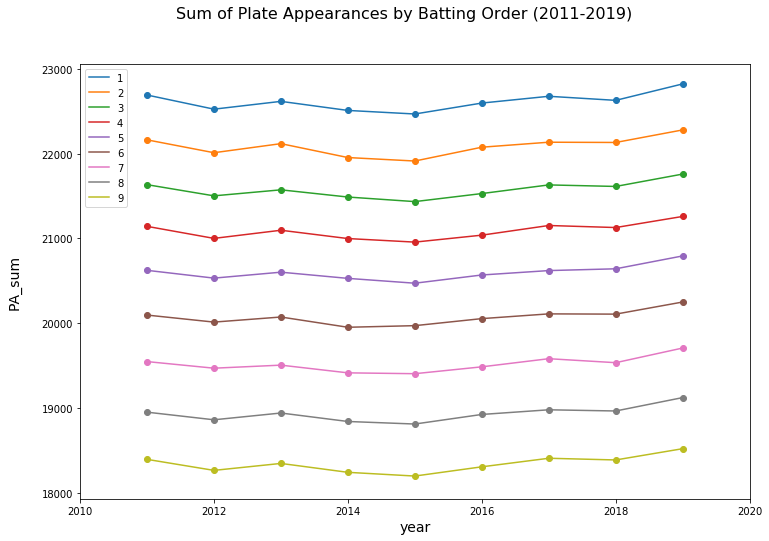

In [9]:
generate_trend(season_dfs, 'PA_sum', 
               'Sum of Plate Appearances by Batting Order')

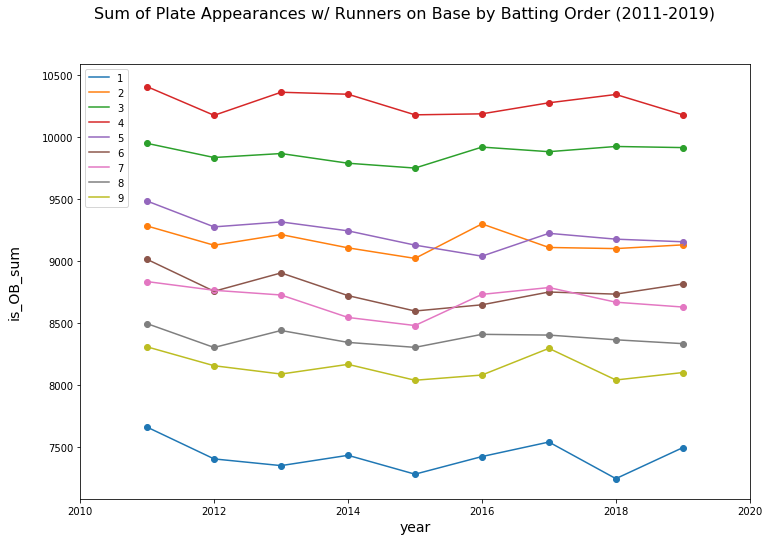

In [10]:
generate_trend(season_dfs, 'is_OB_sum', 
               'Sum of Plate Appearances w/ Runners on Base by Batting Order')

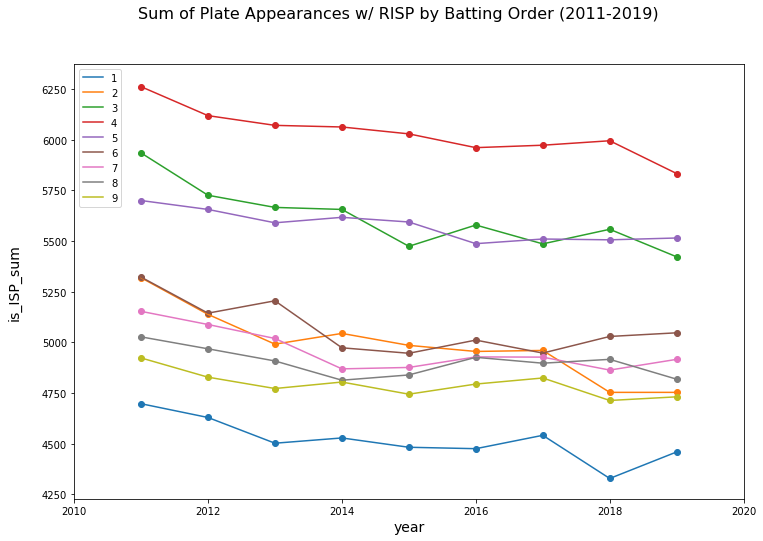

In [11]:
generate_trend(season_dfs, 'is_ISP_sum', 
               'Sum of Plate Appearances w/ RISP by Batting Order')

### Trend 2011-2019 (Mean)

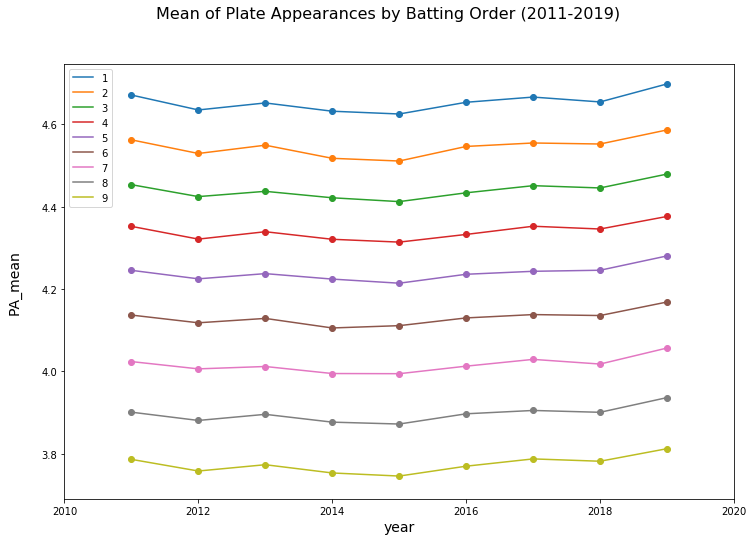

In [12]:
generate_trend(season_dfs, 'PA_mean', 
               'Mean of Plate Appearances by Batting Order')

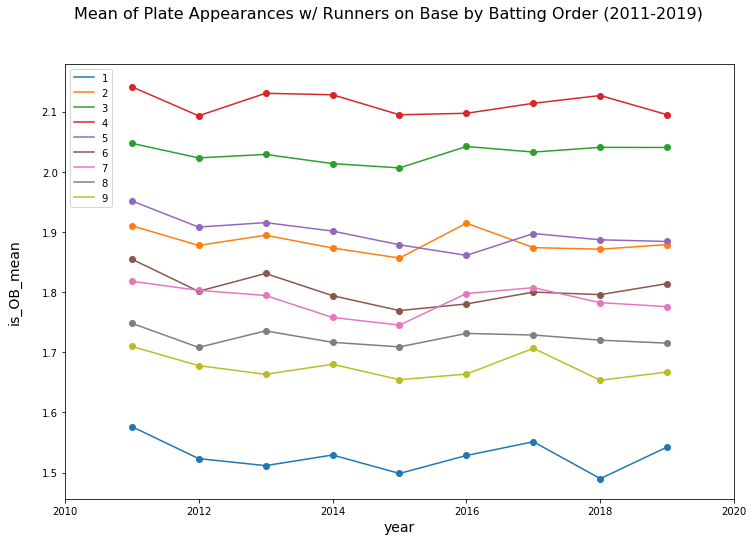

In [13]:
generate_trend(season_dfs, 'is_OB_mean', 
               'Mean of Plate Appearances w/ Runners on Base by Batting Order')

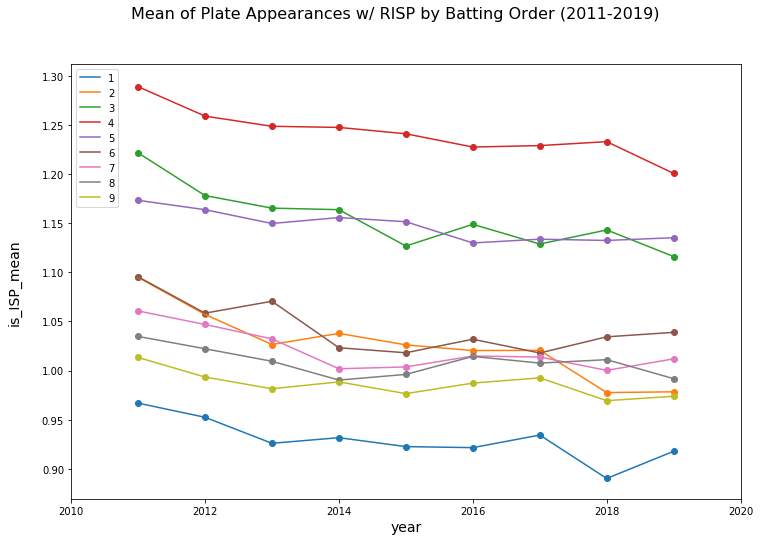

In [14]:
generate_trend(season_dfs, 'is_ISP_mean', 
               'Mean of Plate Appearances w/ RISP by Batting Order')

### Trend 2011-2019 (%)

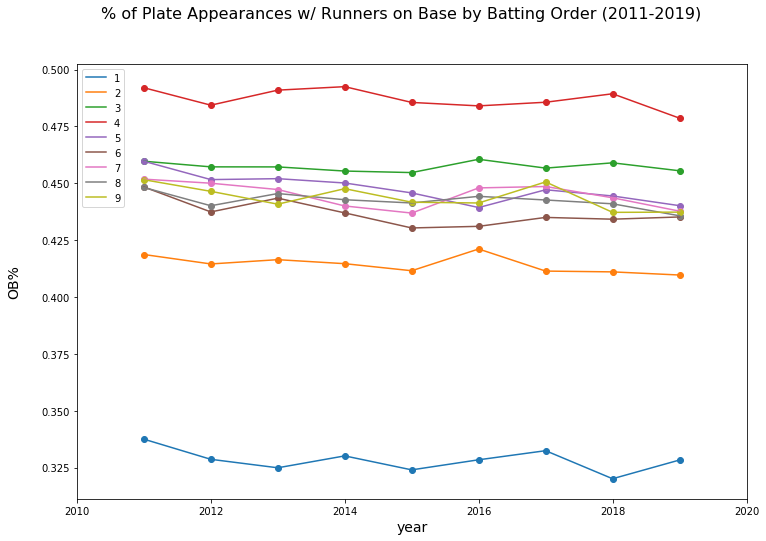

In [15]:
generate_trend(season_dfs, 'OB%', 
               '% of Plate Appearances w/ Runners on Base by Batting Order')

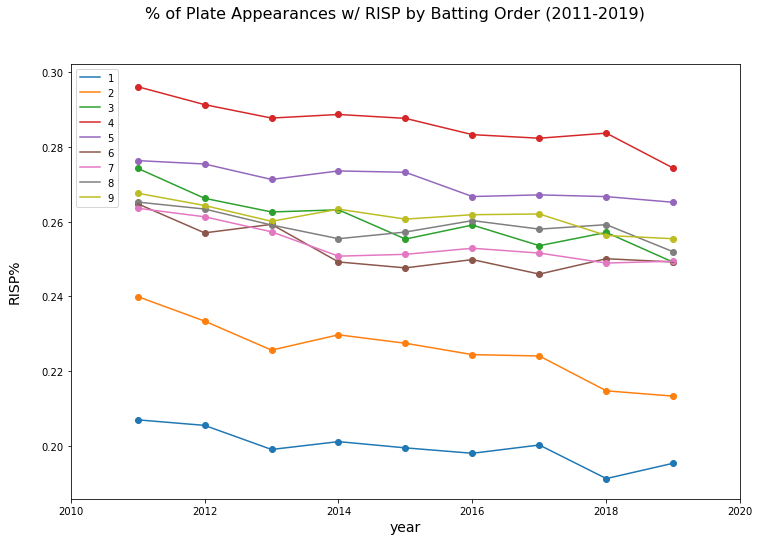

In [16]:
generate_trend(season_dfs, 'RISP%', 
               '% of Plate Appearances w/ RISP by Batting Order')

## Trend 2011-2019 (American League Only)

In [17]:
AL_dict = {}
AL_teams = ['BAL', 'BOS', 'NYY', 'TBR', 'TOR',
            'CHW', 'CLE', 'DET', 'KCR', 'MIN',
            'HOU', 'LAA', 'OAK', 'SEA', 'TEX']
for season in range(2011, 2020):
    if season >= 2013:
        AL_dict[season] = AL_teams
    else:
        AL_dict[season] = [team for team in AL_teams if team != 'HOU']

In [18]:
AL_season_scraped_dict = {}
for season in range(2011, 2020):
    teams = AL_dict[season]
    season_df = pd.concat([scraped_11_19[(scraped_11_19.Season == season) &
                                       (scraped_11_19.Team == team)] 
                         for team in teams])
    AL_season_scraped_dict[season] = season_df

In [19]:
AL_season_dfs = {season: get_season_info(AL_season_scraped_dict, season, 'sum')
                         .drop(['OB%', 'RISP%'], axis=1)
                         .merge(get_season_info(AL_season_scraped_dict, 
                                             season, 'mean'), how='left')
                 for season in range(2011, 2020)}

In [20]:
AL_scraped_11_19 = prepare_data(AL_season_scraped_dict, 'Team')
print(f"Games in this dataset: {int(AL_scraped_11_19.shape[0] / 9)}")

Games in this dataset: 21542


### Season 2019 (AL Only)

In [21]:
AL_season_dfs[2019]

,Batting_Order,PA_sum,is_OB_sum,is_ISP_sum,PA_mean,is_OB_mean,is_ISP_mean,OB%,RISP%
0,1,11415,3835,2230,4.701400,1.579489,0.918451,0.335961,0.195357
1,2,11145,4678,2450,4.590198,1.926689,1.009061,0.419740,0.219830
2,3,10877,4967,2776,4.479819,2.045717,1.143328,0.456652,0.255217
3,4,10638,5086,2960,4.381384,2.094728,1.219110,0.478097,0.278248
4,5,10393,4543,2730,4.280478,1.871087,1.124382,0.437121,0.262677
5,6,10111,4327,2444,4.164333,1.782125,1.006590,0.427950,0.241717
6,7,9864,4335,2447,4.062603,1.785420,1.007825,0.439477,0.248074
7,8,9569,4131,2357,3.941104,1.701400,0.970758,0.431707,0.246316
8,9,9267,3989,2317,3.816722,1.642916,0.954283,0.430452,0.250027


### Trend 2011-2019 (Sum) (AL Only)

In [22]:
AL = 'American League'

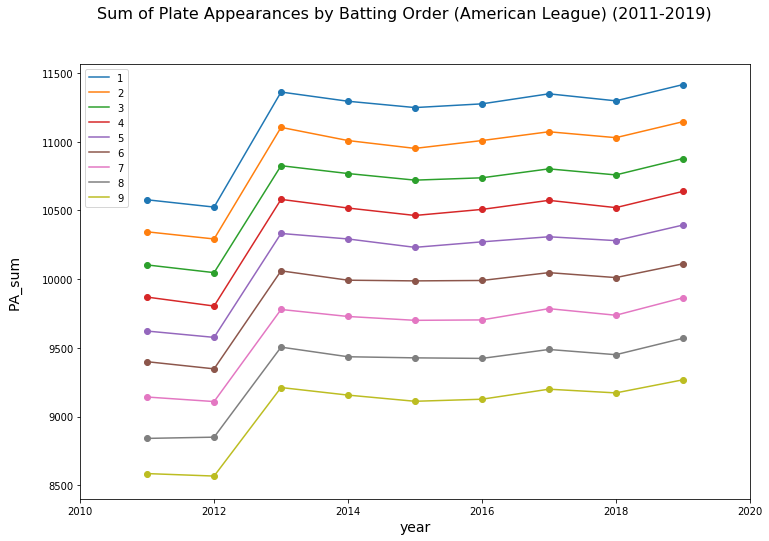

In [23]:
generate_trend(AL_season_dfs, 'PA_sum', 
               f'Sum of Plate Appearances by Batting Order ({AL})')

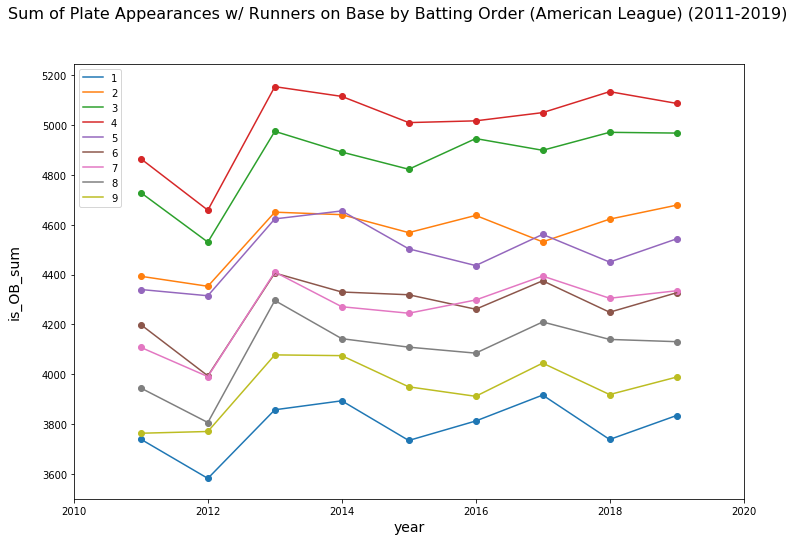

In [26]:
generate_trend(AL_season_dfs, 'is_OB_sum', 
               f'Sum of Plate Appearances w/ Runners on Base by Batting Order ({AL})')

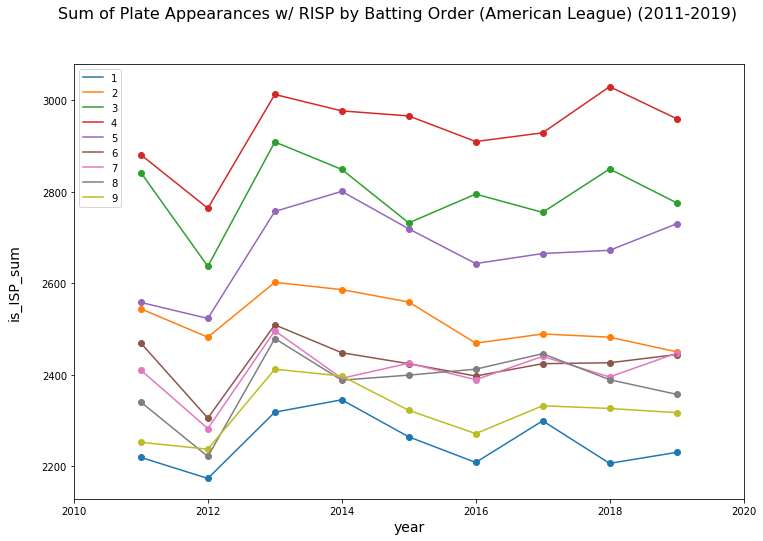

In [27]:
generate_trend(AL_season_dfs, 'is_ISP_sum', 
               f'Sum of Plate Appearances w/ RISP by Batting Order ({AL})')

### Trend 2011-2019 (Mean) (AL Only)

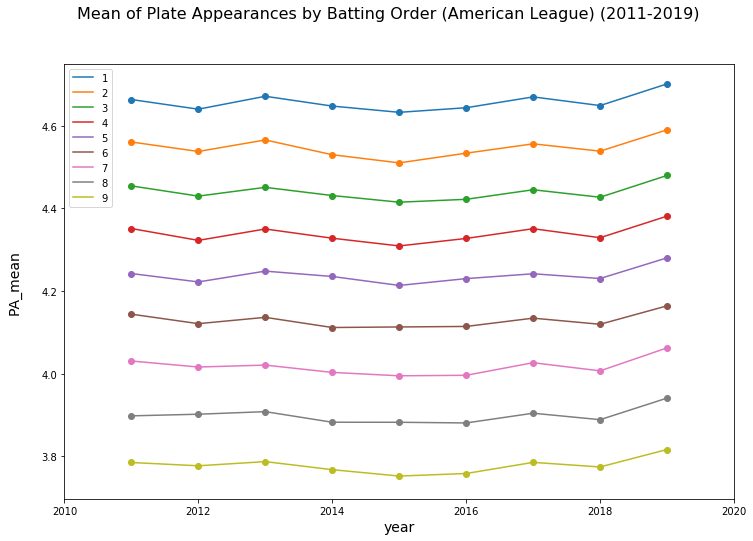

In [28]:
generate_trend(AL_season_dfs, 'PA_mean', 
               f'Mean of Plate Appearances by Batting Order ({AL})')

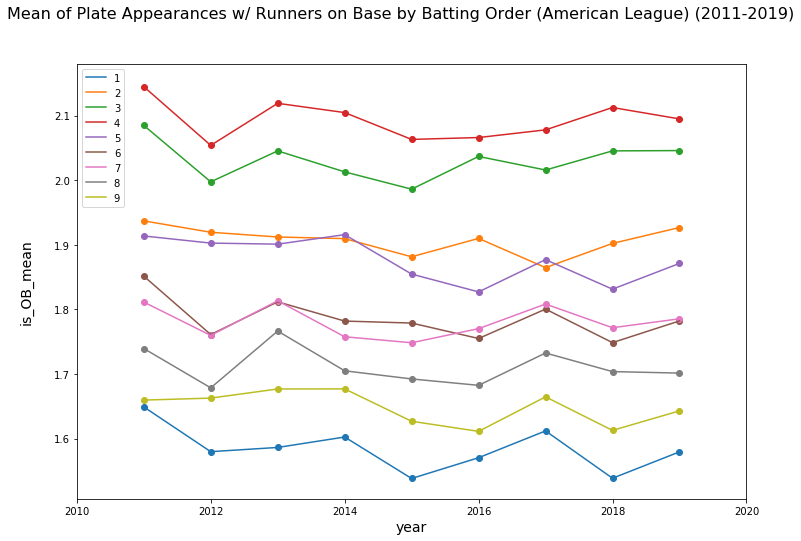

In [29]:
generate_trend(AL_season_dfs, 'is_OB_mean', 
               f'Mean of Plate Appearances w/ Runners on Base by Batting Order ({AL})')

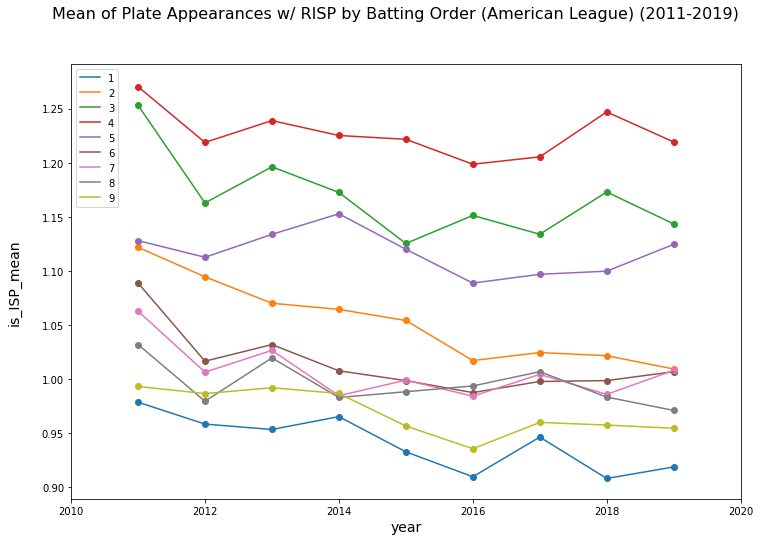

In [30]:
generate_trend(AL_season_dfs, 'is_ISP_mean', 
               f'Mean of Plate Appearances w/ RISP by Batting Order ({AL})')

### Trend 2011-2019 (%) (AL Only)

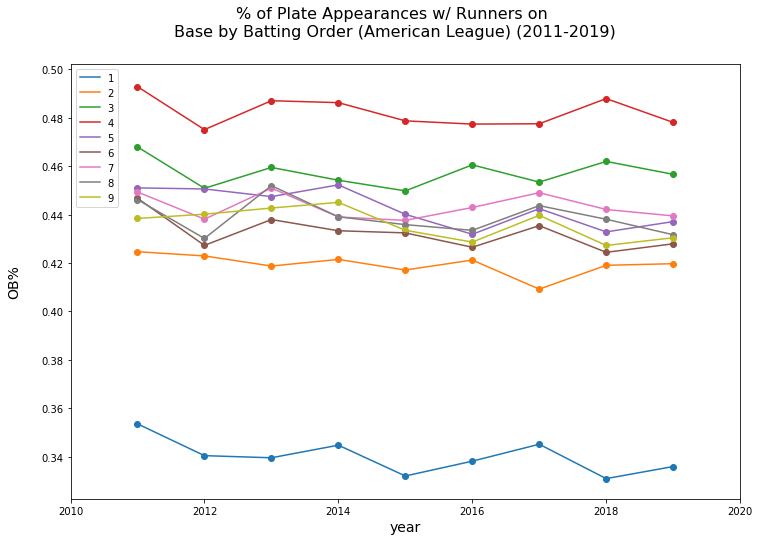

In [31]:
generate_trend(AL_season_dfs, 'OB%', 
               f'% of Plate Appearances w/ Runners on \nBase by Batting Order ({AL})')

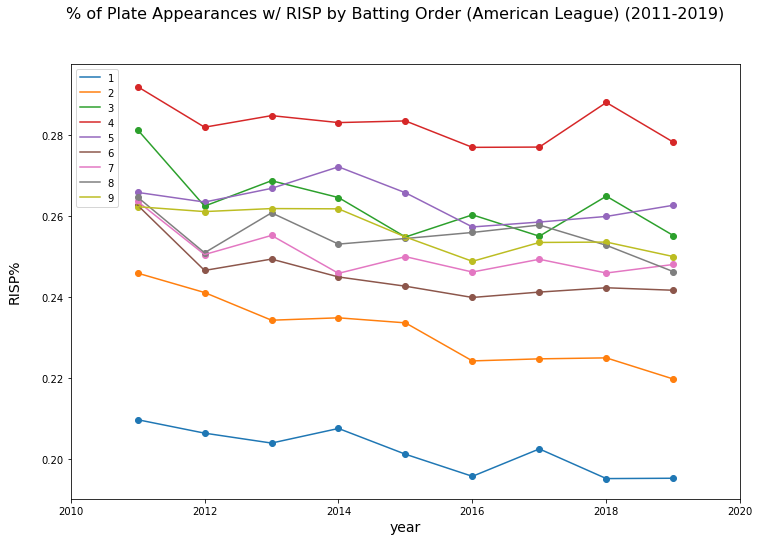

In [32]:
generate_trend(AL_season_dfs, 'RISP%', 
               f'% of Plate Appearances w/ RISP by Batting Order ({AL})')

## Trend 2011-2019 (No.1 R/G)

In [33]:
rg_season_scraped_dict = {}
max_rg = list(val_11_19.groupby(by='Season')['R/G'].max().reset_index().values)
max_rg_dict = {int(x[0]): x[1] for x in max_rg}
for season in range(2011, 2020):
    max_rg = max_rg_dict[season]
    team = val_11_19[(val_11_19.Season == season) &
                     (val_11_19['R/G'] == max_rg)].Tm.values[0]
    season_df = scraped_11_19[(scraped_11_19.Season == season) &
                              (scraped_11_19.Team == team)]
    rg_season_scraped_dict[season] = season_df

In [34]:
for season in range(2011, 2020):
    print(f'{rg_season_scraped_dict[season].Season_Tm.values[0]}')

2011 BOS
2012 TEX
2013 BOS
2014 LAA
2015 TOR
2016 BOS
2017 HOU
2018 BOS
2019 NYY


In [35]:
rg_season_dfs = {season: get_season_info(rg_season_scraped_dict, season, 'sum')
                         .drop(['OB%', 'RISP%'], axis=1)
                         .merge(get_season_info(rg_season_scraped_dict, 
                                             season, 'mean'), how='left')
                 for season in range(2011, 2020)}

In [36]:
RG = '#1 R/G Teams'

### Trend 2011-2019 (Mean) (No.1 R/G)

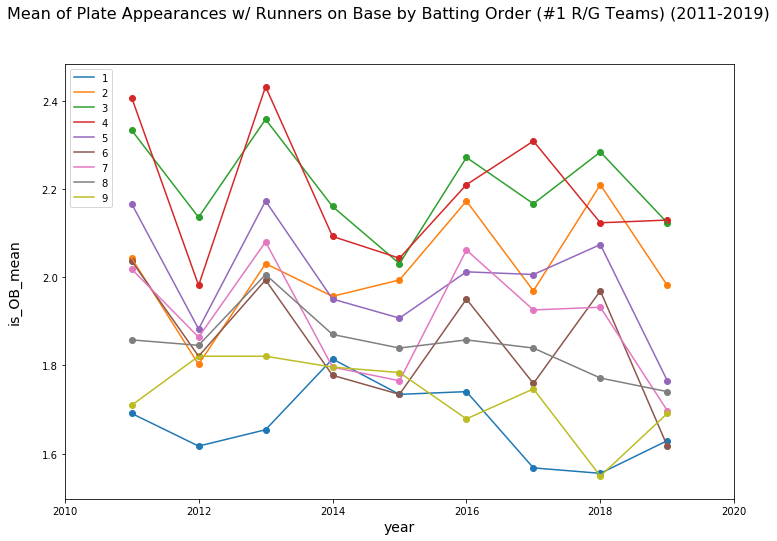

In [37]:
generate_trend(rg_season_dfs, 'is_OB_mean', 
               f'Mean of Plate Appearances w/ Runners on Base by Batting Order ({RG})')

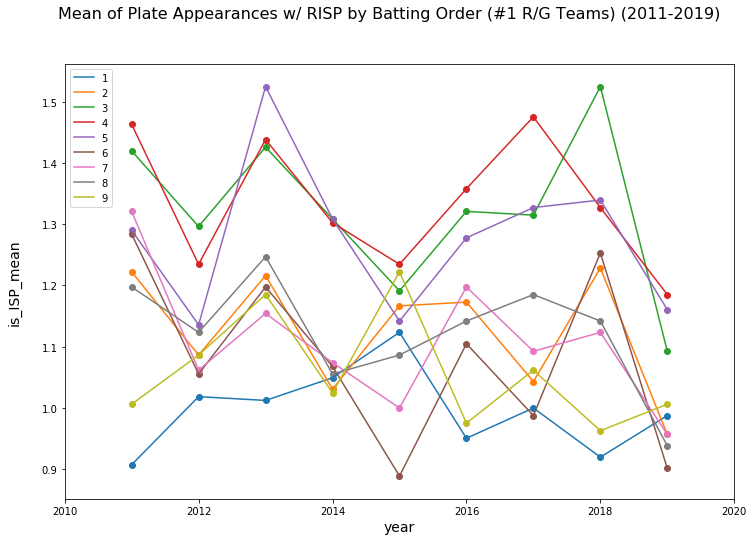

In [38]:
generate_trend(rg_season_dfs, 'is_ISP_mean', 
               f'Mean of Plate Appearances w/ RISP by Batting Order ({RG})')

### Trend 2011-2019 (%) (No.1 R/G)

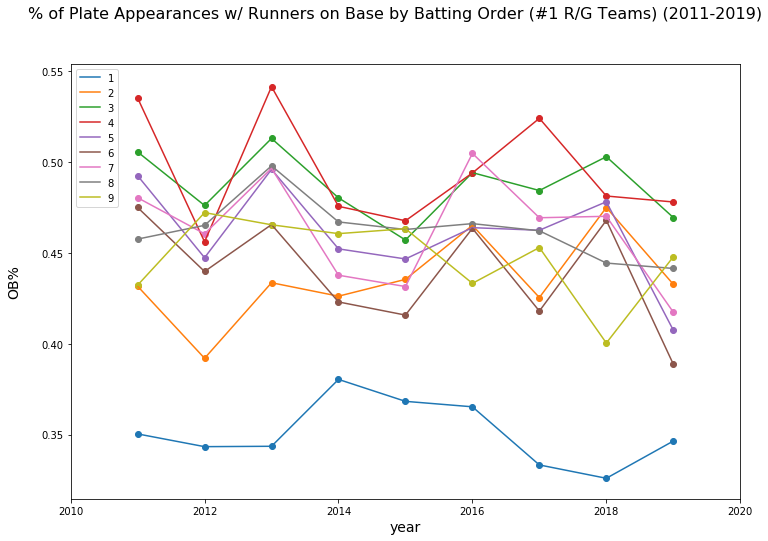

In [39]:
generate_trend(rg_season_dfs, 'OB%', 
               f'% of Plate Appearances w/ Runners on Base by Batting Order ({RG})')

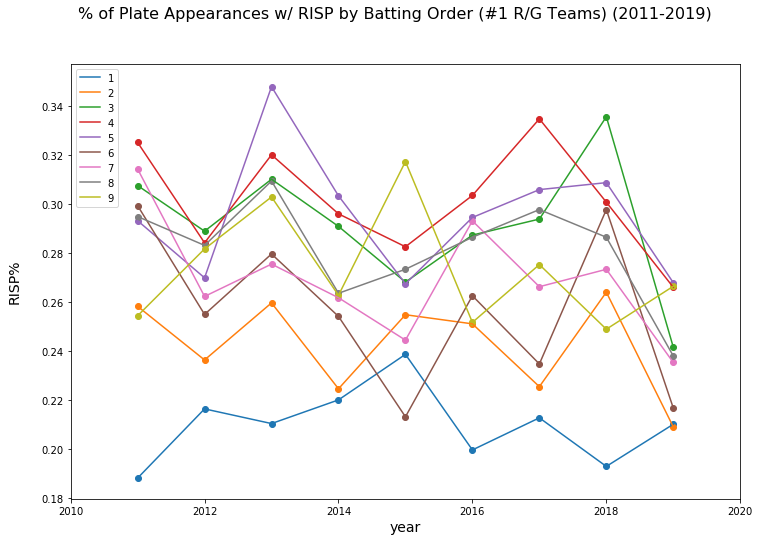

In [40]:
generate_trend(rg_season_dfs, 'RISP%', 
               f'% of Plate Appearances w/ RISP by Batting Order ({RG})')

## Trend 2011-2019 (Top 5 R/G)

In [41]:
rg5_season_scraped_dict = {}
for season in range(2011, 2020):
    teams = list(season_val_dict[season].sort_values('R/G')\
                                        .tail(5)['Tm'].values)
    print(f'{season}: {teams}')
    season_df = pd.concat([scraped_11_19[(scraped_11_19.Season == season) &
                                         (scraped_11_19.Team == team)]
                           for team in teams])
    rg5_season_scraped_dict[season] = season_df

2011: ['STL', 'DET', 'TEX', 'NYY', 'BOS']
2012: ['STL', 'LAA', 'MIL', 'NYY', 'TEX']
2013: ['BAL', 'OAK', 'STL', 'DET', 'BOS']
2014: ['TOR', 'OAK', 'COL', 'DET', 'LAA']
2015: ['COL', 'BOS', 'TEX', 'NYY', 'TOR']
2016: ['STL', 'CLE', 'CHC', 'COL', 'BOS']
2017: ['WSN', 'CHC', 'COL', 'NYY', 'HOU']
2018: ['LAD', 'OAK', 'CLE', 'NYY', 'BOS']
2019: ['LAD', 'BOS', 'HOU', 'MIN', 'NYY']


In [42]:
rg5_season_dfs = {season: get_season_info(rg5_season_scraped_dict, 
                                          season, 'sum')
                          .drop(['OB%', 'RISP%'], axis=1)
                          .merge(get_season_info(rg5_season_scraped_dict, 
                                                  season, 'mean'), 
                                  how='left')
                  for season in range(2011, 2020)}

In [43]:
RG5 = 'Top 5 R/G Teams'

### Trend 2011-2019 (Mean) (Top 5 R/G)

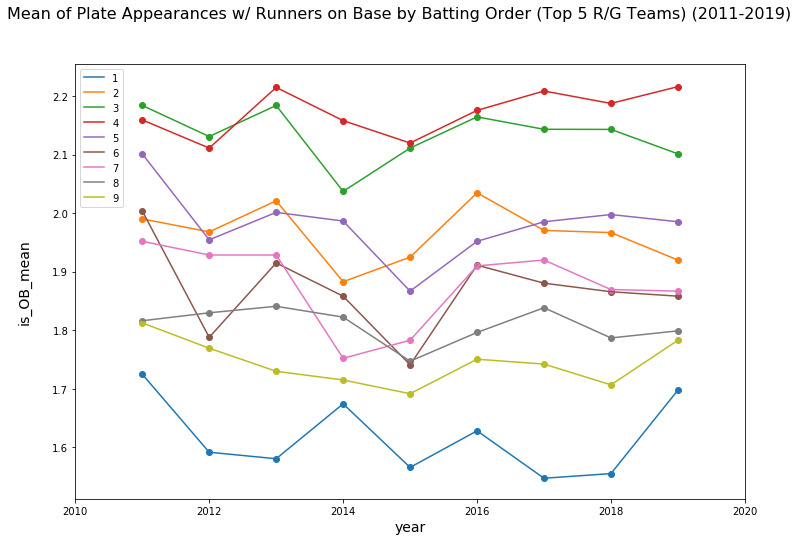

In [44]:
generate_trend(rg5_season_dfs, 'is_OB_mean', 
               f'Mean of Plate Appearances w/ Runners on Base by Batting Order ({RG5})')

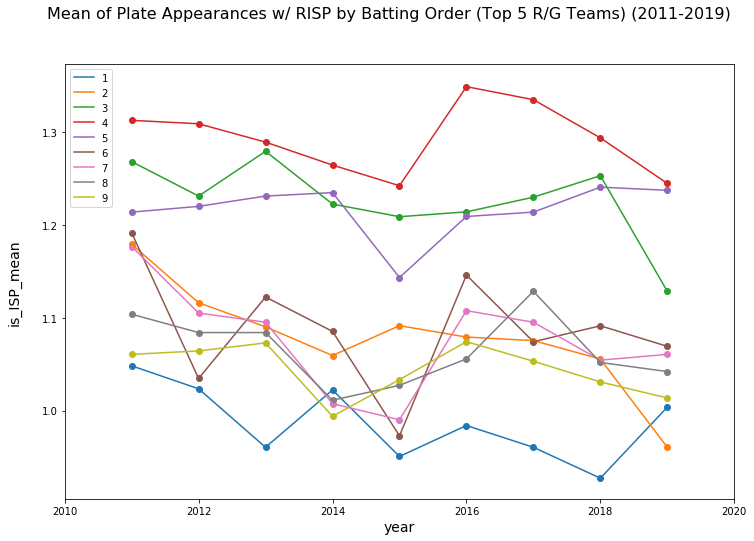

In [45]:
generate_trend(rg5_season_dfs, 'is_ISP_mean', 
               f'Mean of Plate Appearances w/ RISP by Batting Order ({RG5})')

### Trend 2011-2018 (%) (Top 5 R/G)

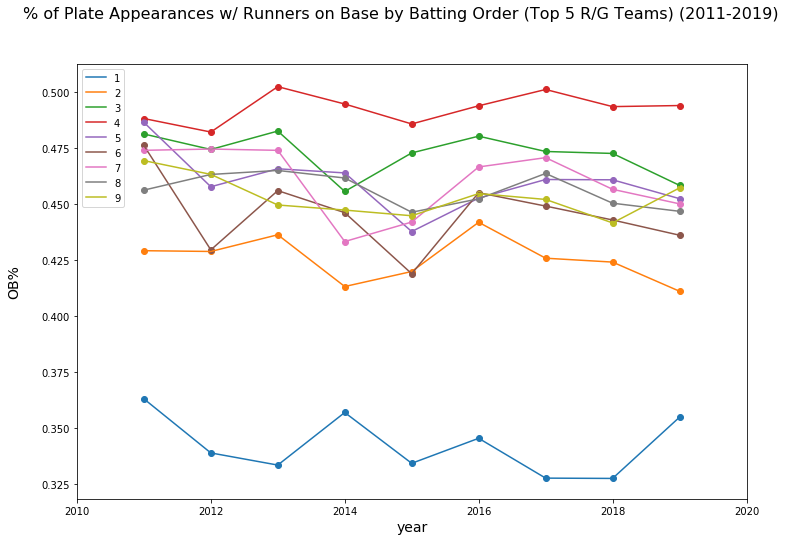

In [46]:
generate_trend(rg5_season_dfs, 'OB%', 
               f'% of Plate Appearances w/ Runners on Base by Batting Order ({RG5})')

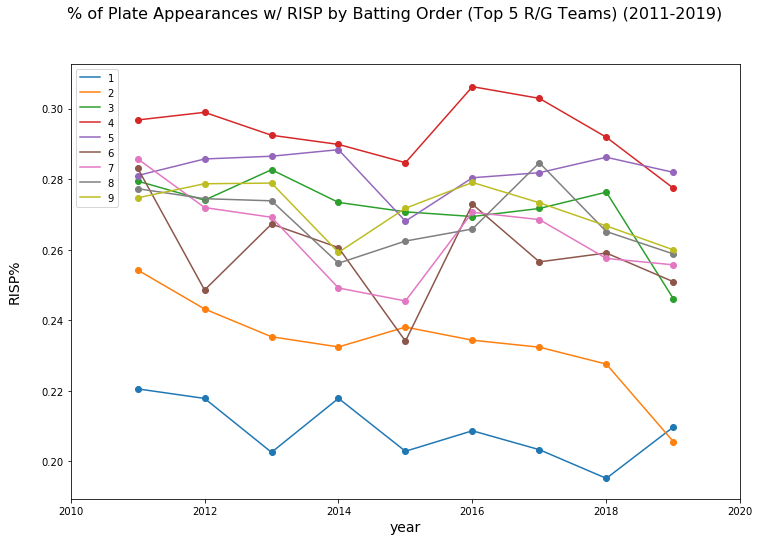

In [47]:
generate_trend(rg5_season_dfs, 'RISP%', 
               f'% of Plate Appearances w/ RISP by Batting Order ({RG5})')

## Trend 2011-2019 (When Total PA over 38)

In [48]:
scraped_11_19.head()

,Batting_Order,PA,is_OB,is_ISP,Team,URL,GM,Season,Season_Tm
0,1,5,1,0,KCR,https://www.baseball-reference.com/boxes/KCA/K...,1,2011,2011 KCR
1,2,5,1,0,KCR,https://www.baseball-reference.com/boxes/KCA/K...,1,2011,2011 KCR
2,3,5,4,2,KCR,https://www.baseball-reference.com/boxes/KCA/K...,1,2011,2011 KCR
3,4,4,2,2,KCR,https://www.baseball-reference.com/boxes/KCA/K...,1,2011,2011 KCR
4,5,4,2,2,KCR,https://www.baseball-reference.com/boxes/KCA/K...,1,2011,2011 KCR


In [50]:
o38_season_scraped_dict = {}
for season in range(2011, 2020):
    df = scraped_11_19[scraped_11_19.Season == season]
    teams = list(set(df.Team.values))
    temp_dfs = []
    for team in teams:
        team_df = df[df.Team == team].groupby(by='GM').PA.sum().reset_index()
        o38_gms = team_df[team_df.PA > 38].GM.values
        temp_dfs.append(df[(df.Team == team) & (df.GM.isin(o38_gms))])
    o38_season_scraped_dict[season] = pd.concat(temp_dfs)

In [51]:
o38_season_dfs = {season: get_season_info(o38_season_scraped_dict, 
                                          season, 'sum')
                          .drop(['OB%', 'RISP%'], axis=1)
                          .merge(get_season_info(o38_season_scraped_dict, 
                                                  season, 'mean'), 
                                 how='left')
                  for season in range(2011, 2020)}

In [52]:
o38 = '38+ PA Games'

### Trend 2011-2019 (Mean) (38+ PA Games)

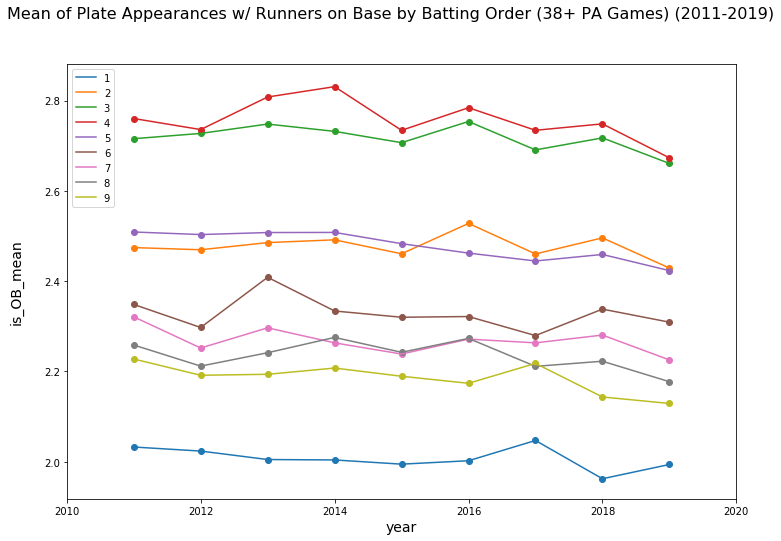

In [53]:
generate_trend(o38_season_dfs, 'is_OB_mean', 
               f'Mean of Plate Appearances w/ Runners on Base by Batting Order ({o38})')

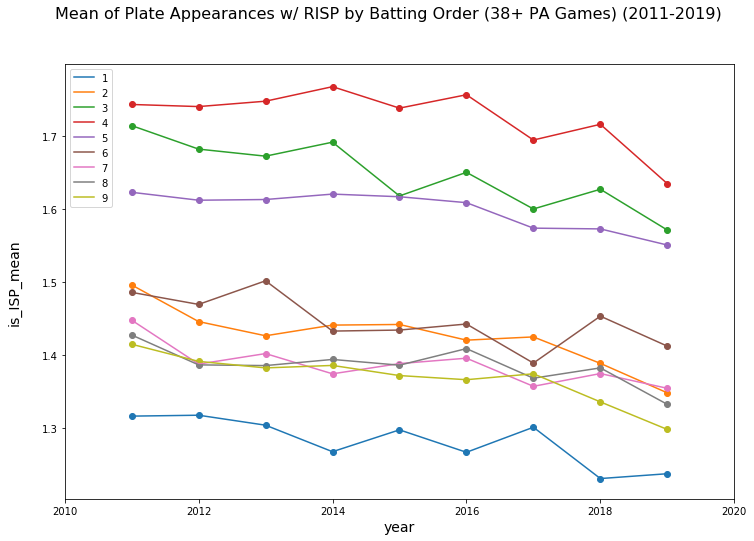

In [54]:
generate_trend(o38_season_dfs, 'is_ISP_mean', 
               f'Mean of Plate Appearances w/ RISP by Batting Order ({o38})')

### Trend 2011-2019 (%) (38+ PA Games)

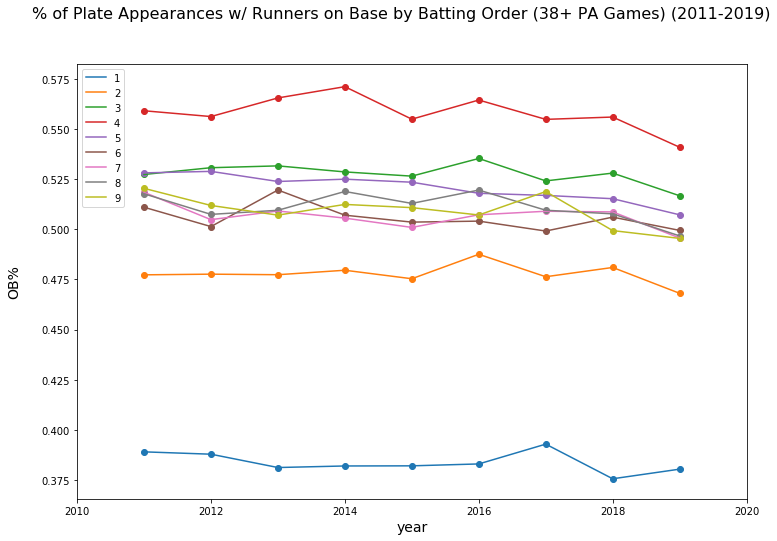

In [57]:
generate_trend(o38_season_dfs, 'OB%', 
               f'% of Plate Appearances w/ Runners on Base by Batting Order ({o38})')

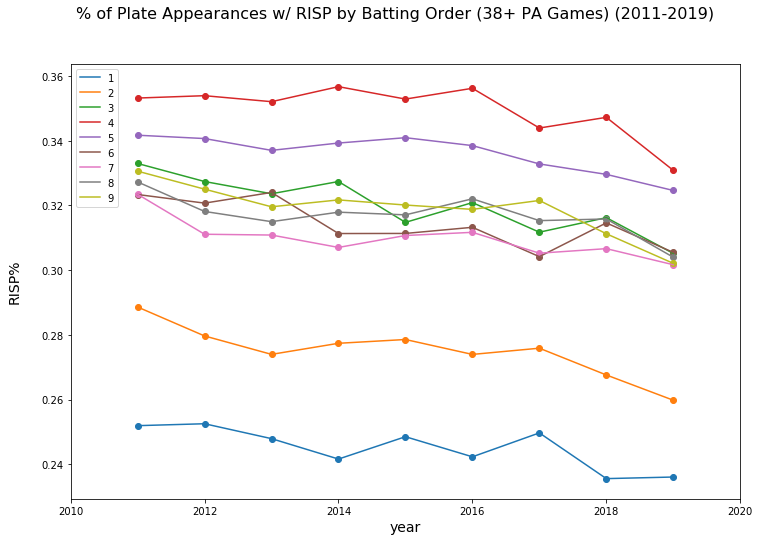

In [58]:
generate_trend(o38_season_dfs, 'RISP%', 
               f'% of Plate Appearances w/ RISP by Batting Order ({o38})')

## HR Trend (2011-2019)

Text(0.5, 0.98, 'Home Run (2011-2019)\n')

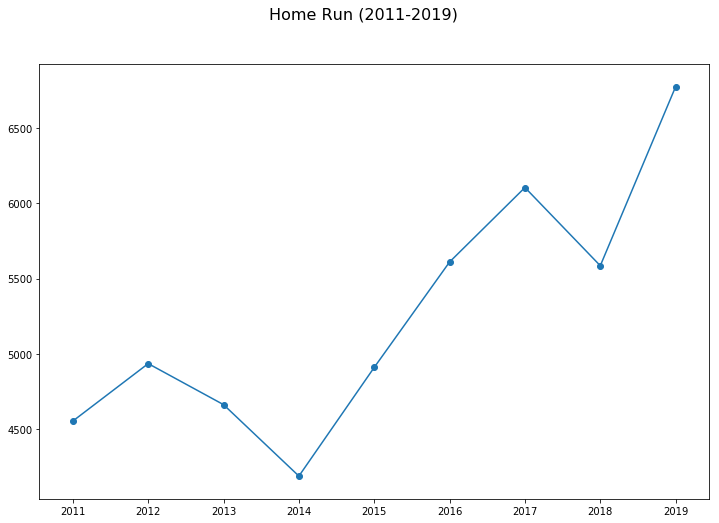

In [59]:
figsize(12, 8)
seasons = [i for i in range(2011, 2020)]
ys = val_11_19.groupby(by='Season').HR.sum().reset_index().HR.values
plt.plot(seasons, ys)
plt.scatter(seasons, ys)
plt.suptitle(f'Home Run (2011-2019)\n', fontsize=16)

## Individual Cases

### Angels

In [60]:
scraped_11_19[scraped_11_19.Season_Tm == '2018 LAA']\
.groupby('Batting_Order')[["PA", "is_OB", "is_ISP"]]\
.mean().reset_index()

,Batting_Order,PA,is_OB,is_ISP
0,1,4.598765,1.475309,0.808642
1,2,4.462963,1.691358,0.919753
2,3,4.376543,2.098765,1.160494
3,4,4.302469,2.166667,1.327160
4,5,4.209877,1.734568,0.993827
5,6,4.111111,1.672840,0.919753
6,7,4.018519,1.746914,0.938272
7,8,3.882716,1.722222,1.024691
8,9,3.740741,1.456790,0.851852


In [61]:
scraped_11_19[scraped_11_19.Season_Tm == '2018 LAA']\
.groupby('GM')[['PA']].sum().reset_index()\
.groupby('PA').count().reset_index()

,PA,GM
0,28,4
1,30,3
2,31,6
3,32,9
4,33,7
5,34,11
6,35,18
7,36,15
8,37,13
9,38,13


### Yankees

In [62]:
scraped_11_19[scraped_11_19.Season_Tm == '2018 NYY']\
.groupby('Batting_Order')[["PA", "is_OB", "is_ISP"]]\
.mean().reset_index()

,Batting_Order,PA,is_OB,is_ISP
0,1,4.722222,1.530864,0.895062
1,2,4.604938,1.956790,0.932099
2,3,4.518519,2.179012,1.296296
3,4,4.413580,2.129630,1.222222
4,5,4.333333,2.024691,1.185185
5,6,4.197531,1.851852,1.061728
6,7,4.104938,1.950617,1.049383
7,8,3.969136,1.790123,0.969136
8,9,3.845679,1.586420,1.030864


In [64]:
scraped_11_19[scraped_11_19.Season_Tm == '2018 NYY']\
.groupby('GM')[['PA']].sum().reset_index()\
.groupby('PA').count().reset_index()

,PA,GM
0,28,1
1,30,1
2,31,2
3,32,9
4,33,5
5,34,17
6,35,12
7,36,14
8,37,16
9,38,13
